In [2]:
# Local Module
from modules import process as prc

# Data Science
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Display
from IPython.display import display

In [67]:
train_data = pandas.read_csv('../data/training_data.csv', sep=',', header=0)
test_data = pandas.read_csv('../data/testing_data.csv', sep=',', header=0)

X_train = train_data.iloc[:, 0:6]
X_test = test_data.iloc[:, 0:6]

y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]

       net_worth        net_xp  team_winrate_avg  score  net_barracks  \
0   16799.350000    -70.883333         -1.463812     -3             2   
1   17518.700000  29539.900000          1.185695     26             6   
2    9660.000000  12920.250000         -1.499135      0             2   
3  -21140.433333 -21830.950000         -1.687254     -8            -3   
4  -25098.566667 -26932.916667         -1.898660    -24            -6   
..           ...           ...               ...    ...           ...   
95  21387.133333  30329.983333         -2.150746     18             6   
96  18286.100000  21999.833333         -0.199552      4             4   
97  -3302.683333 -16652.966667         -0.154880      1            -4   
98  25328.750000  22421.450000          1.556380     29             6   
99 -30290.100000 -35067.033333         -2.556862    -20            -2   

    duration  radiant_win  
0       4253         True  
1       2199         True  
2       2415         True  
3       318

In [4]:
# bernoulli
BernNP = BernoulliNB(binarize = True)
BernNP.fit(X_train, y_train)

y_pred = BernNP.predict(X_test)
print(prc.accuracy_score(y_pred, y_test))

96.0


In [5]:
# Gaussian
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)

y_pred = gaussNB.predict(X_test)

print(prc.accuracy_score(y_pred, y_test))

96.0


In [6]:
# ID3
dTree = DecisionTreeClassifier(criterion='entropy')
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(178.48283160146698, 211.04470588235293, 'net_worth <= -6.242\nentropy = 0.996\nsamples = 9130\nvalue = [4237, 4893]'),
 Text(74.97698655256724, 198.25411764705882, 'net_barracks <= -1.5\nentropy = 0.317\nsamples = 4300\nvalue = [4053, 247]'),
 Text(25.683007334963325, 185.4635294117647, 'net_worth <= -9836.942\nentropy = 0.075\nsamples = 3743\nvalue = [3709, 34]'),
 Text(9.00440097799511, 172.6729411764706, 'net_xp <= -5776.533\nentropy = 0.027\nsamples = 3332\nvalue = [3323, 9]'),
 Text(3.274327628361858, 159.88235294117646, 'score <= -7.5\nentropy = 0.004\nsamples = 3067\nvalue = [3066, 1]'),
 Text(1.637163814180929, 147.09176470588235, 'entropy = 0.0\nsamples = 2698\nvalue = [2698, 0]'),
 Text(4.911491442542787, 147.09176470588235, 'net_xp <= -30189.208\nentropy = 0.027\nsamples = 369\nvalue = [368, 1]'),
 Text(3.274327628361858, 134.30117647058825, 'net_xp <= -30546.142\nentropy = 0.131\nsamples = 55\nvalue = [54, 1]'),
 Text(1.637163814180929, 121.51058823529411, 'entropy = 

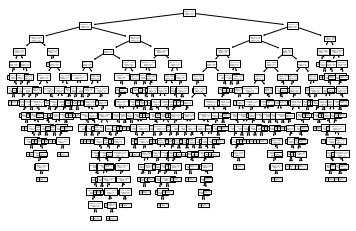

In [7]:
#display(plot_tree(dTree, feature_names=X_train.keys().values))

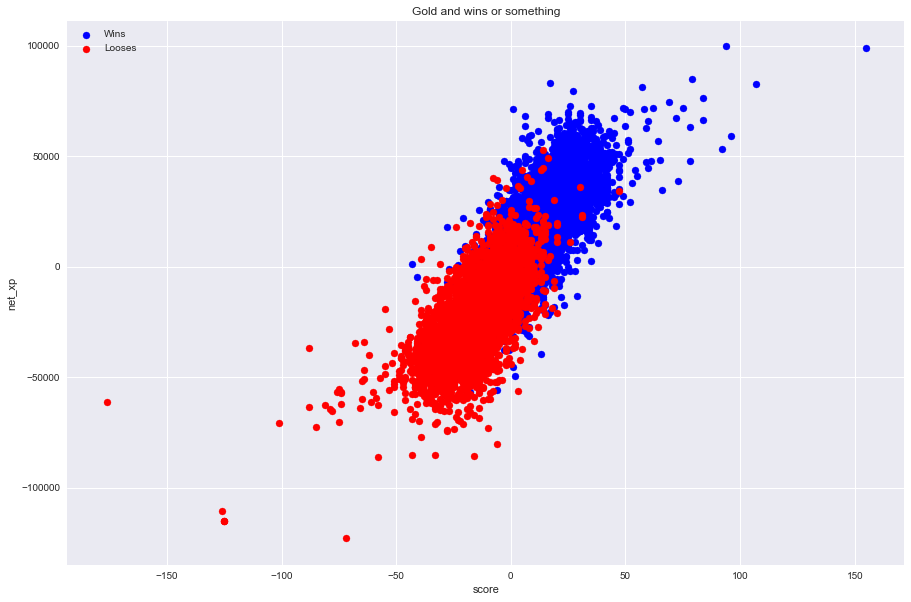

In [33]:
# Get win/loss data
# train
win = train_data[train_data.radiant_win == True]
loss = train_data[train_data.radiant_win == False]
# test
# win = test_data[test_data.radiant_win == True]
# loss = test_data[test_data.radiant_win == False]

data = (win, loss)
colours = ('blue', 'red')
groups = ('Wins', 'Looses')

# Create plot
x_val = 'score'
y_val = 'net_xp'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for datum, colour, group in zip(data, colours, groups):
    x = datum[x_val]
    y = datum[y_val]
    ax.scatter(x, y, c=colour, label=group)
    
# plot
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Gold and wins or something')
plt.legend(loc=2)
plt.xlabel(x_val)
plt.ylabel(y_val)
plt.show()

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

pred = logmodel.predict(X_test) # returns array of predictions [True, True, False, ...]

# print(logmodel.score(X_test, y_test))


# Confusion Matrix
# https://www.listendata.com/2019/07/precision-recall-curve-simplified.html

# True Positive (correctly predicted a win)
true_pos = 0
# False Positive (incorrectly predicted a win)
false_pos = 0
# True Negative (correctly predicted a loss)
true_neg = 0
# False Negative (incorrectly predicted a loss)
false_neg = 0

for i, j in zip(pred, y_test):
    if i == True and j == True:
        true_pos += 1
    elif i == True and j == False:
        false_pos += 1
    elif i == False and j == False:
        true_neg += 1
    elif i == False and j == True:
        false_neg += 1
    else:
        print('Prediction mistake?')
    
# Precision = TP / (TP+FP) = Correctly guessed positive
precision = true_pos / (true_pos + false_pos)
# Recall = TP / (TP+FN) = Proportion of losses predicted as losses
recall = true_pos / (true_pos + false_neg)
    
print('True positive: {}'.format(true_pos))
print('False positive: {}'.format(false_pos))
print('True negative: {}'.format(true_neg))
print('False negative: {}'.format(false_neg))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))

# TODO
# -Larger test sample size
# -Make a table for the confusion matrix


True positive: 57
False positive: 2
True negative: 40
False negative: 1
Precision: 0.9661016949152542
Recall: 0.9827586206896551
